In [1]:
import pandas as pd
import os
import numpy as np

import matplotlib.pyplot as plt, seaborn as sns

%matplotlib inline

plt.rcParams['figure.figsize'] = (12,8)

In [2]:
os.getcwd()

'/media/pranit/769A7EDE9A7E9A77/PP - Learning Stuff/Learning/Udemy/Python Stats A to Z/Section 6'

In [3]:
data = pd.read_csv('P4-Movie-Ratings.csv')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Film                       559 non-null    object
 1   Genre                      559 non-null    object
 2   Rotten Tomatoes Ratings %  559 non-null    int64 
 3   Audience Ratings %         559 non-null    int64 
 4   Budget (million $)         559 non-null    int64 
 5   Year of release            559 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [4]:
data.shape

(559, 6)

In [5]:
data.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating', 'Budget', 'Year']
data.Year = data.Year.astype('category')
data.Film = data.Film.astype('category')
data.Genre = data.Genre.astype('category')
data.head()

,Film,Genre,CriticRating,AudienceRating,Budget,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CriticRating,559.0,47.309481,26.413091,0.0,25.0,46.0,70.0,97.0
AudienceRating,559.0,58.744186,16.826887,0.0,47.0,58.0,72.0,96.0
Budget,559.0,50.236136,48.731817,0.0,20.0,35.0,65.0,300.0


In [7]:
data.Genre.unique()

['Comedy', 'Adventure', 'Action', 'Horror', 'Drama', 'Romance', 'Thriller']
Categories (7, object): ['Comedy', 'Adventure', 'Action', 'Horror', 'Drama', 'Romance', 'Thriller']

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Film            559 non-null    category
 1   Genre           559 non-null    category
 2   CriticRating    559 non-null    int64   
 3   AudienceRating  559 non-null    int64   
 4   Budget          559 non-null    int64   
 5   Year            559 non-null    category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


/home/pranit/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


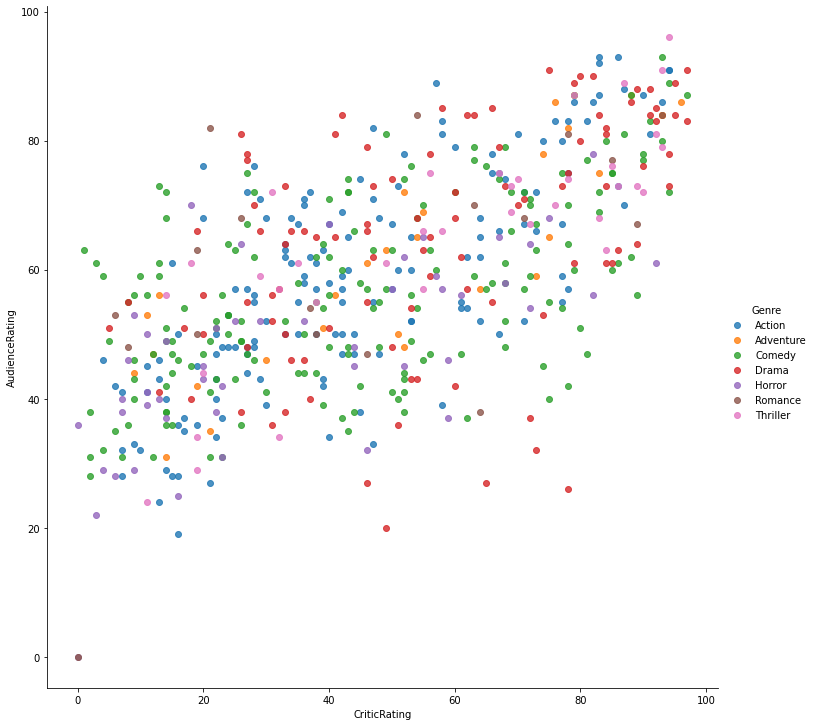

In [9]:
sns.lmplot(x = 'CriticRating', y = 'AudienceRating', data = data,hue = 'Genre', fit_reg=False, size=10)

/home/pranit/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/pranit/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


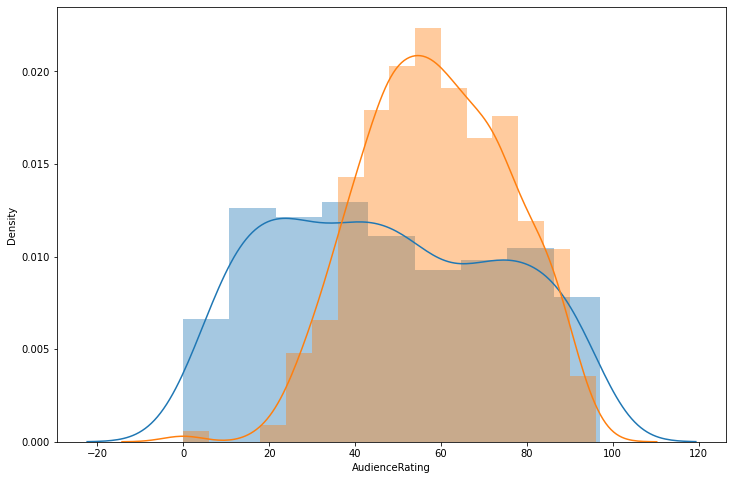

In [10]:
sns.distplot(data.CriticRating)
sns.distplot(data.AudienceRating)
plt.show()

Joint Plots
----

In [11]:
plt.rcParams['figure.figsize'] = (12,8)

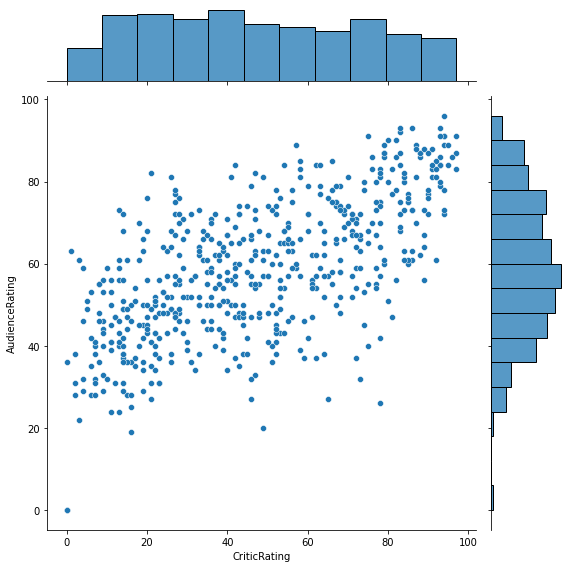

In [12]:
sns.jointplot(x = 'CriticRating', y = 'AudienceRating', data = data, height=8)
plt.show()

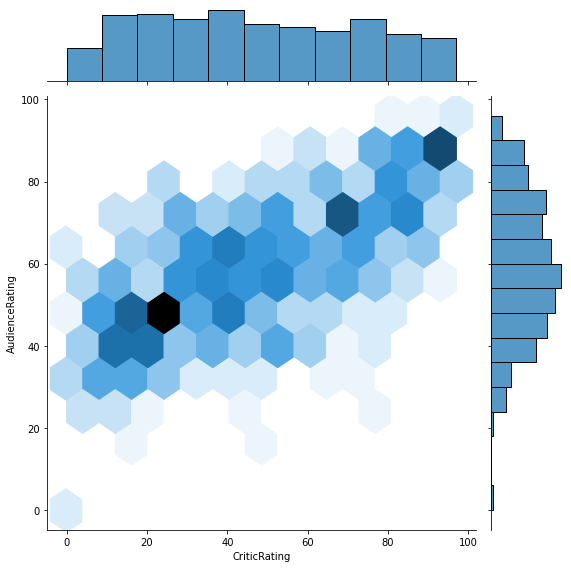

In [13]:
sns.jointplot(x = 'CriticRating', y = 'AudienceRating', data = data, height=8, kind='hex')
plt.show()

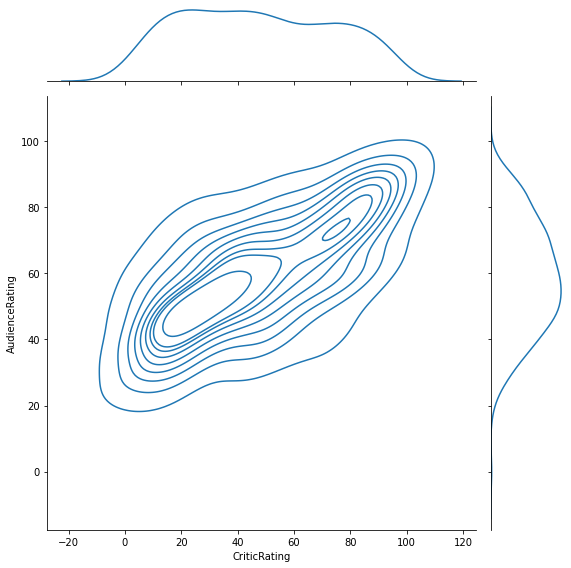

In [14]:
sns.jointplot(x = 'CriticRating', y = 'AudienceRating', data = data, height=8, kind='kde')
plt.show()

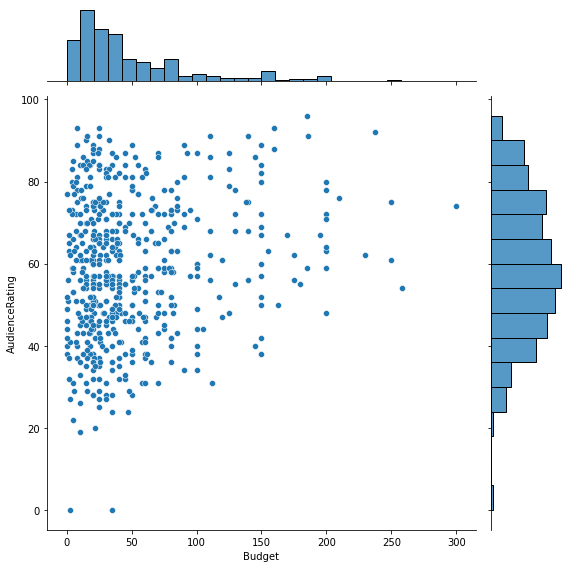

In [15]:
sns.jointplot(x = 'Budget', y = 'AudienceRating', data = data, height=8)
plt.show()

Stacked Histogram
----

In [16]:
sns.set_style("darkgrid")

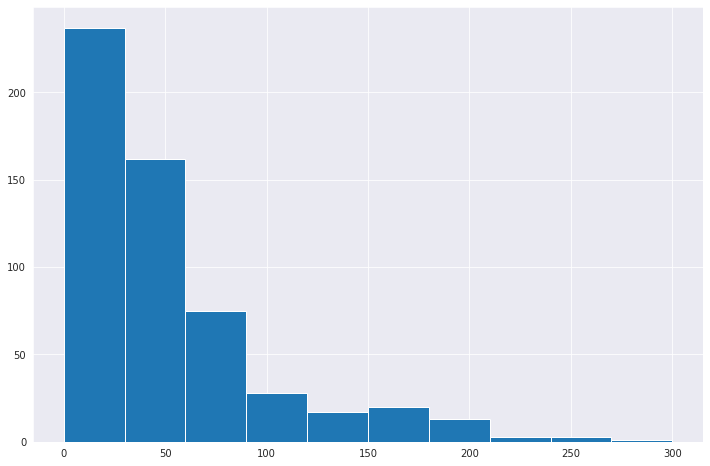

In [17]:
plt.hist(data.Budget)
plt.show()

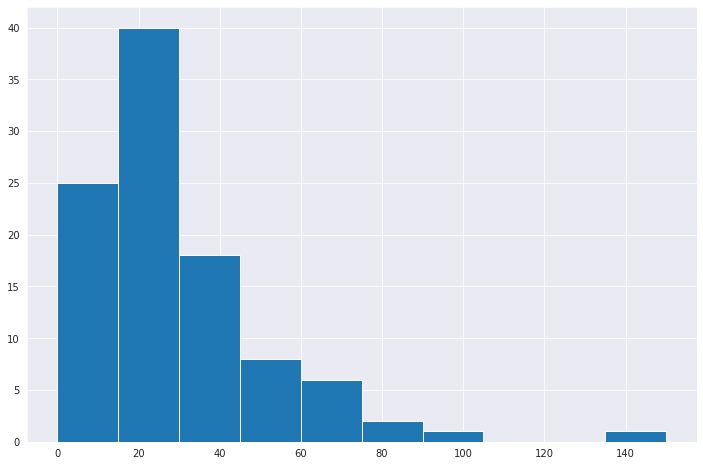

In [18]:
plt.hist(data[data.Genre == "Drama"].Budget)
plt.show()

In [19]:
genre = []
labels = []
for i in data.Genre.unique():
    genre.append(data[data.Genre == i].Budget)
    labels.append(i)

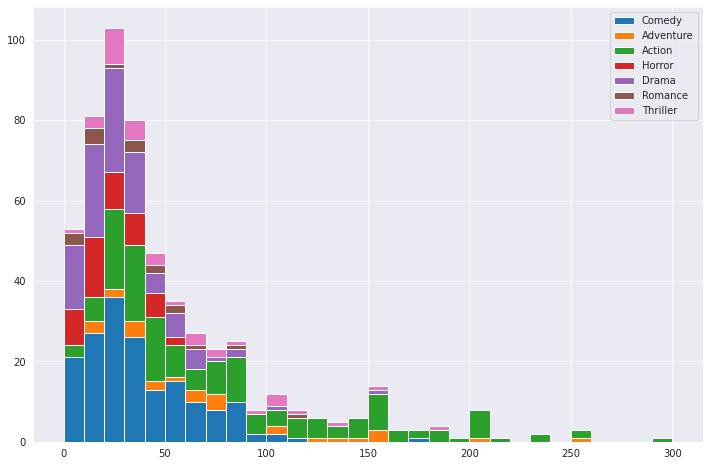

In [20]:
plt.hist(genre,stacked=True, bins=30, rwidth=1, label=labels)
plt.legend()
plt.show()

KDE Plot
-----

/home/pranit/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


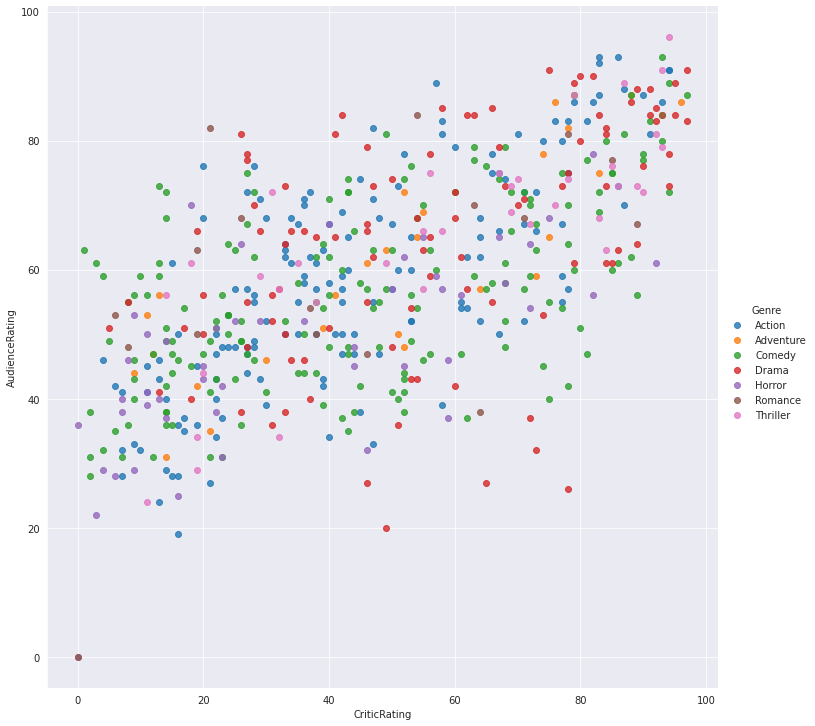

In [21]:
sns.lmplot(x = 'CriticRating', y = 'AudienceRating', data = data, fit_reg=False, hue = 'Genre', size=10, aspect=1)
plt.show()

/home/pranit/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


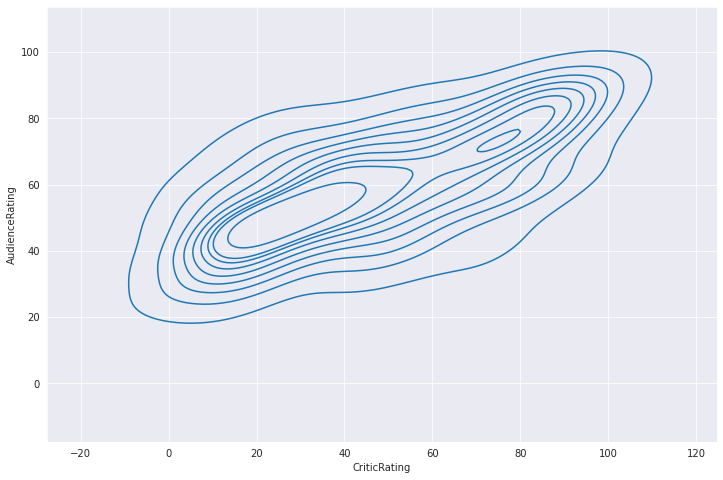

In [22]:
# kerner density estimate plot
sns.kdeplot(data.CriticRating, data.AudienceRating)
plt.show()

/home/pranit/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


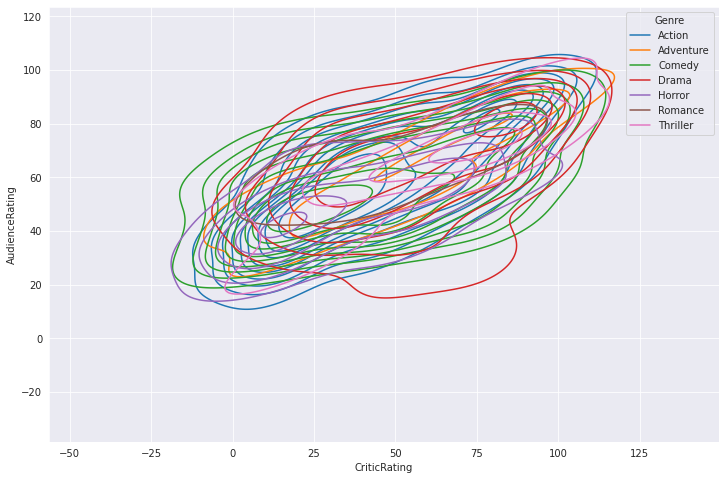

In [23]:
# kerner density estimate plot
sns.kdeplot(data.CriticRating, data.AudienceRating, hue = data.Genre)
plt.show()

/home/pranit/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


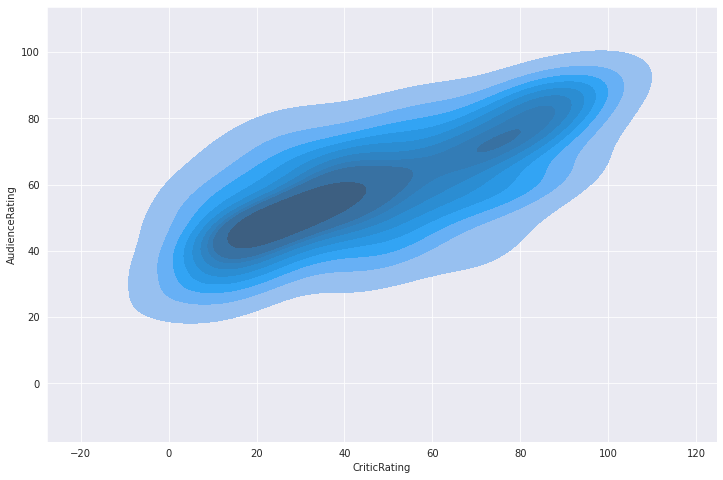

In [24]:
# kerner density estimate plot
sns.kdeplot(data.CriticRating, data.AudienceRating, shade=True)
plt.show()

/home/pranit/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


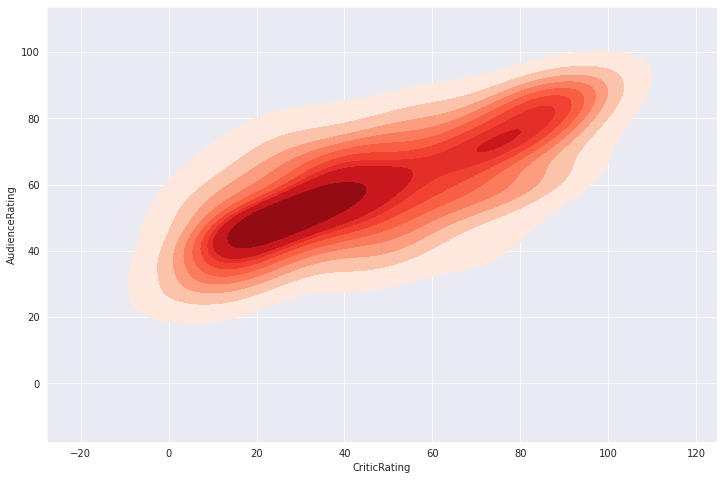

In [25]:
# kerner density estimate plot
sns.kdeplot(data.CriticRating, data.AudienceRating, shade=True, cmap = 'Reds')
plt.show()

/home/pranit/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


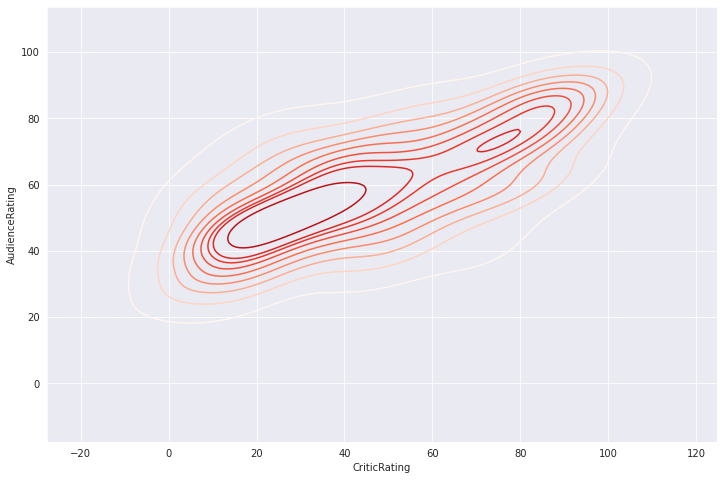

In [26]:
# kerner density estimate plot
sns.kdeplot(data.CriticRating, data.AudienceRating, cmap = 'Reds')
plt.show()

/home/pranit/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/pranit/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


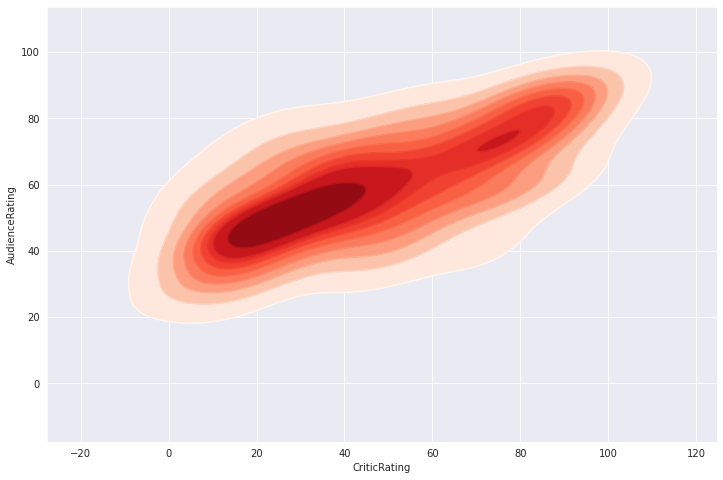

In [27]:
# kerner density estimate plot
sns.kdeplot(data.CriticRating, data.AudienceRating, shade=True, cmap = 'Reds')
sns.kdeplot(data.CriticRating, data.AudienceRating, cmap = 'Reds')
plt.show()

/home/pranit/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/pranit/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


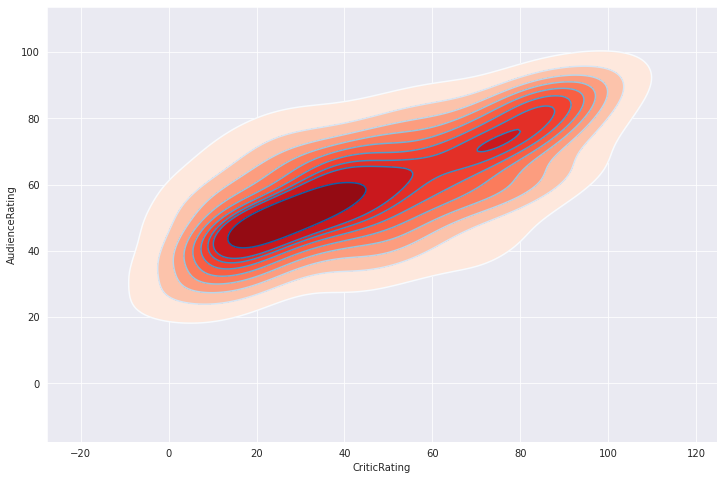

In [28]:
# kerner density estimate plot
sns.kdeplot(data.CriticRating, data.AudienceRating, shade=True, cmap = 'Reds')
sns.kdeplot(data.CriticRating, data.AudienceRating, cmap = 'Blues')
plt.show()

Subplots
-----

/home/pranit/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/pranit/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


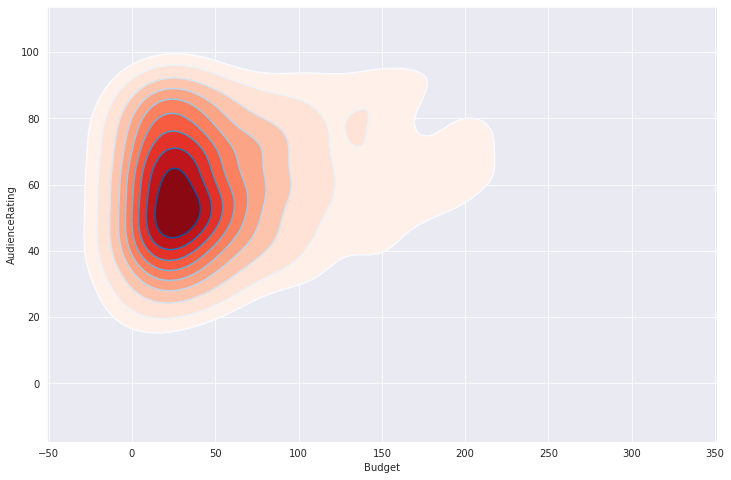

In [32]:
sns.kdeplot(data.Budget, data.AudienceRating, shade=True, cmap = 'Reds')
sns.kdeplot(data.Budget, data.AudienceRating, cmap = 'Blues')

plt.show()

/home/pranit/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/pranit/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


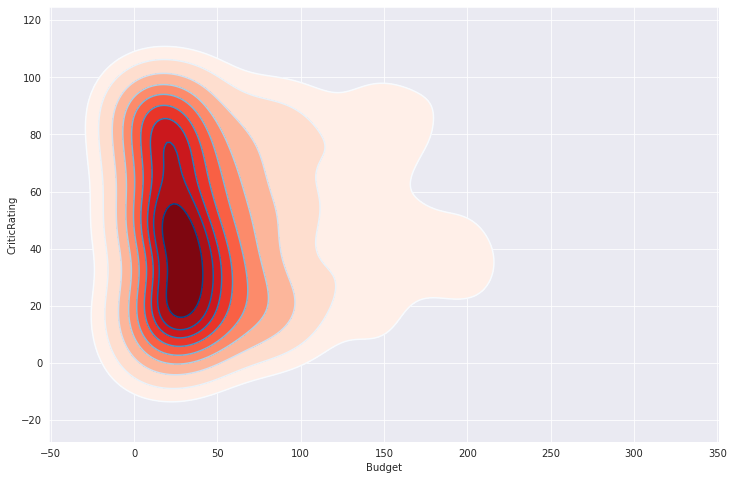

In [33]:
sns.kdeplot(data.Budget, data.CriticRating, shade=True, cmap = 'Reds')
sns.kdeplot(data.Budget, data.CriticRating, cmap = 'Blues')

plt.show()

In [36]:
import warnings
warnings.filterwarnings('ignore')

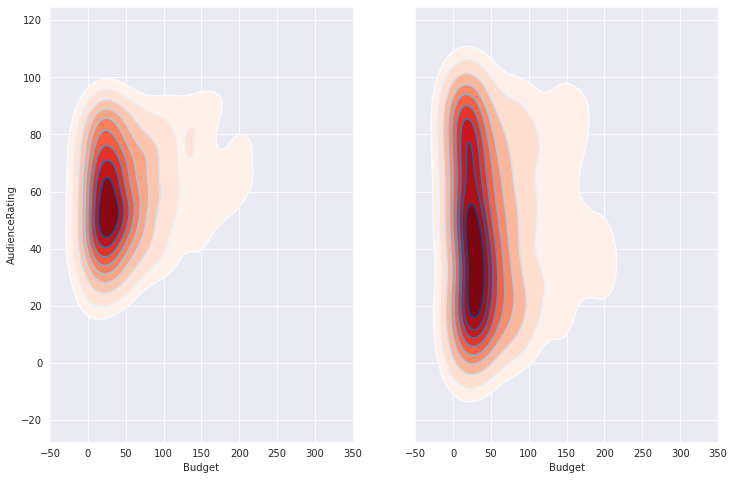

In [49]:
f, ax = plt.subplots(1,2, figsize = (12,8), sharex=True, sharey=True)
sns.kdeplot(data.Budget, data.AudienceRating, shade=True, cmap = 'Reds', ax = ax[0])
sns.kdeplot(data.Budget, data.AudienceRating, cmap = 'Blues', ax = ax[0])

sns.kdeplot(data.Budget, data.CriticRating, shade=True, cmap = 'Reds', ax=ax[1])
sns.kdeplot(data.Budget, data.CriticRating, cmap = 'Blues', ax=ax[1])
plt.show()

Violinplots
-----

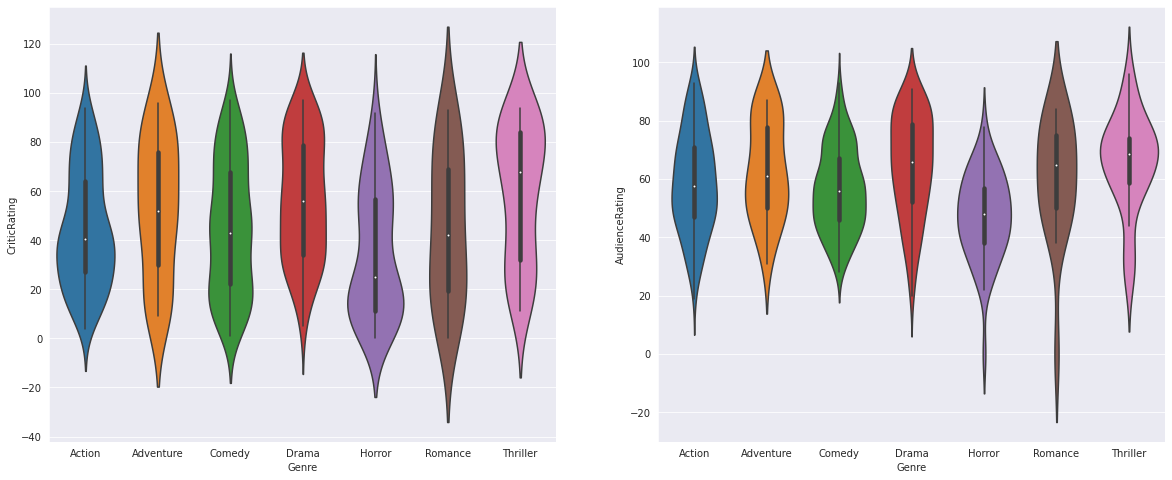

In [59]:
f, ax = plt.subplots(1,2, figsize = (20,8))

sns.violinplot(x = 'Genre', y = 'CriticRating', data = data, ax = ax[0])
sns.violinplot(x = 'Genre', y = 'AudienceRating', data = data, ax = ax[1])
plt.show()

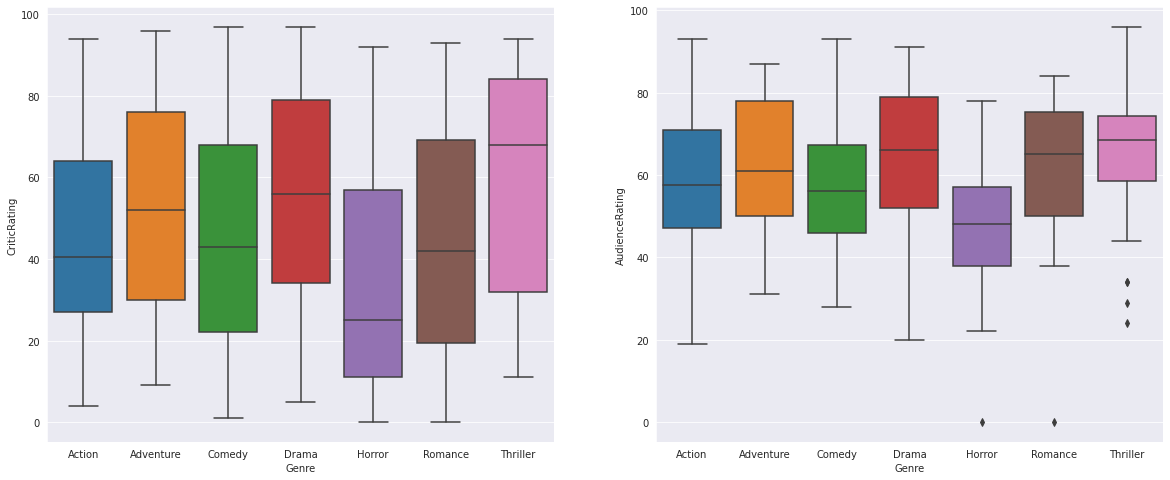

In [61]:
f, ax = plt.subplots(1,2, figsize = (20,8))

sns.boxplot(x = 'Genre', y = 'CriticRating', data = data, ax=ax[0])
sns.boxplot(x = 'Genre', y = 'AudienceRating', data = data, ax=ax[1])
plt.show()

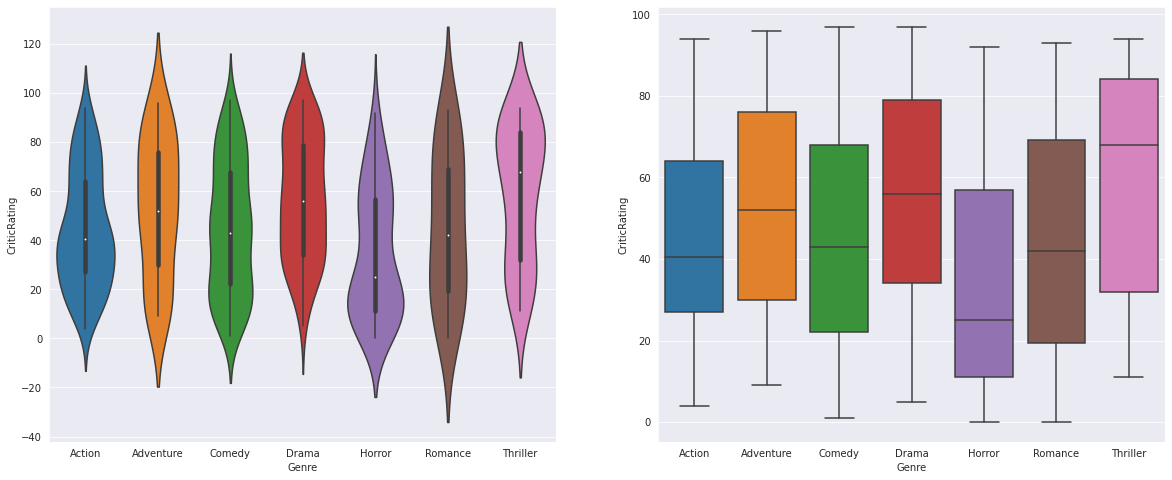

In [62]:
f, ax = plt.subplots(1,2, figsize = (20,8))
sns.violinplot(x = 'Genre', y = 'CriticRating', data = data, ax = ax[0])
sns.boxplot(x = 'Genre', y = 'CriticRating', data = data, ax=ax[1])
plt.show()

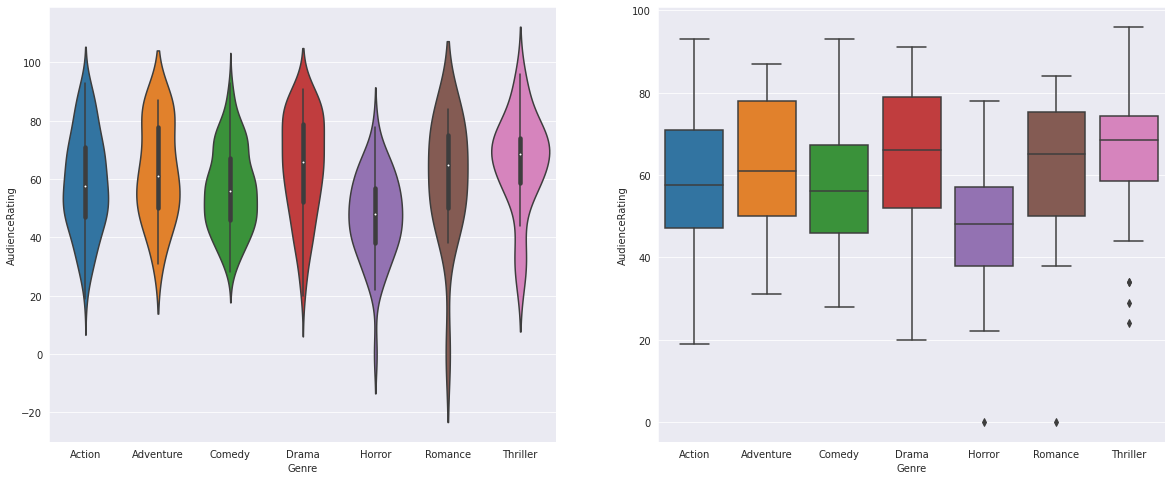

In [63]:
f, ax = plt.subplots(1,2, figsize = (20,8))
sns.violinplot(x = 'Genre', y = 'AudienceRating', data = data, ax = ax[0])
sns.boxplot(x = 'Genre', y = 'AudienceRating', data = data, ax=ax[1])
plt.show()

Facet Grids
----

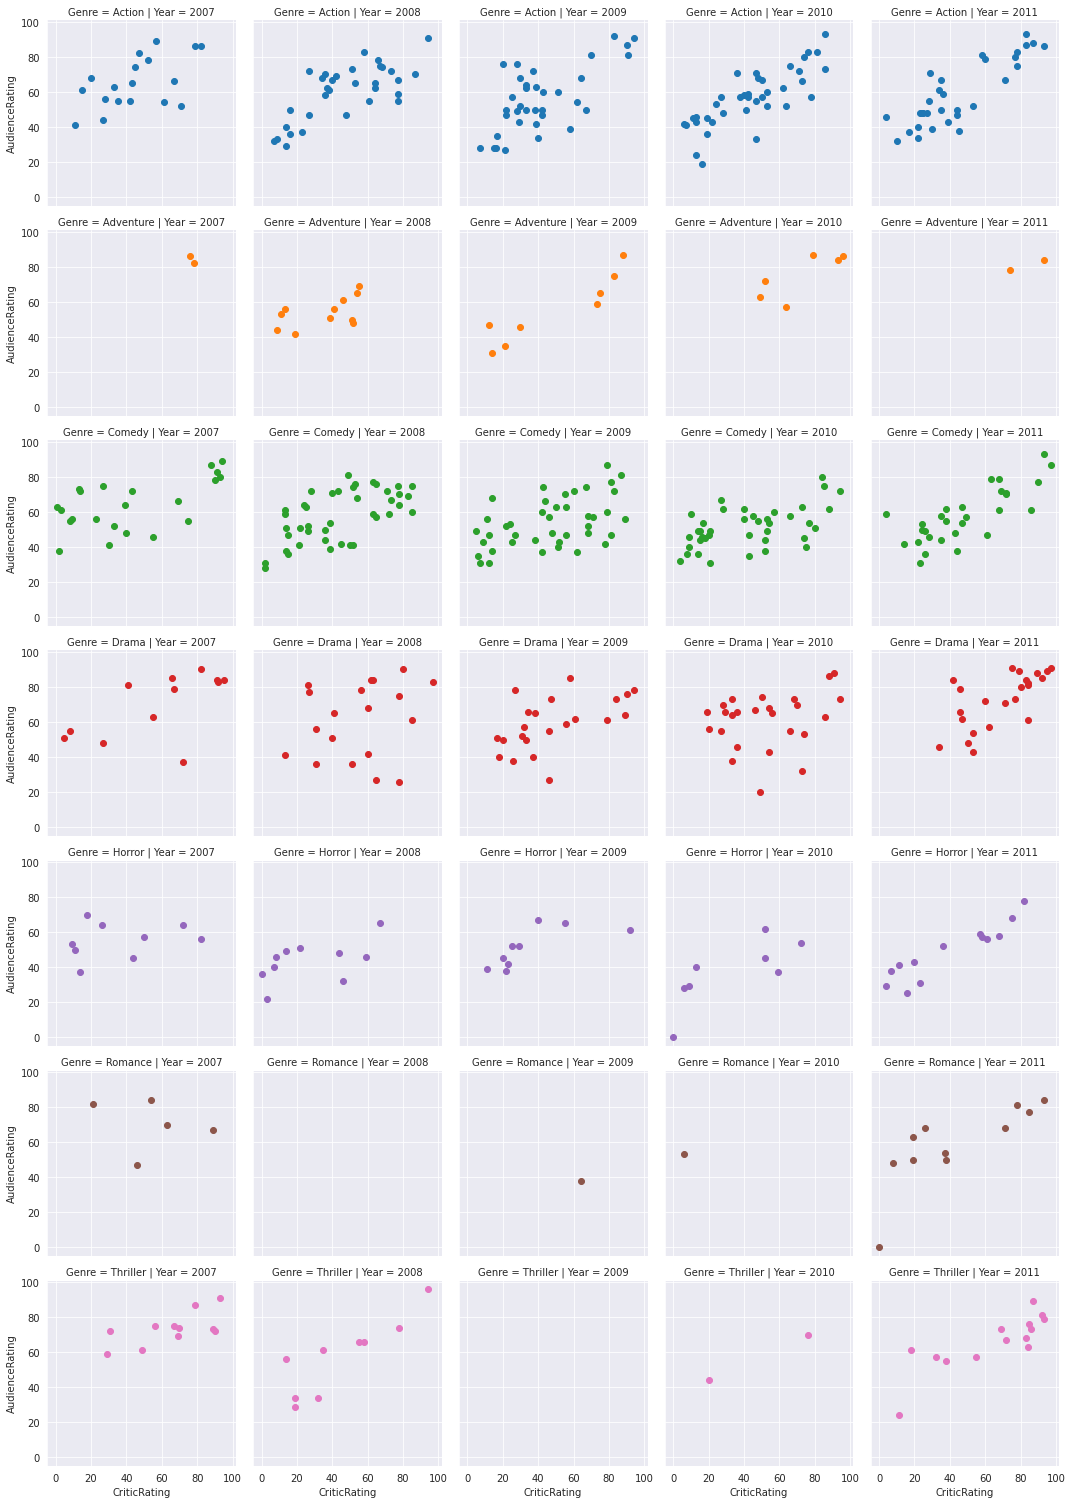

In [70]:
f = sns.FacetGrid(data, row = "Genre", col='Year',hue='Genre')
f = f.map(plt.scatter, 'CriticRating', 'AudienceRating')

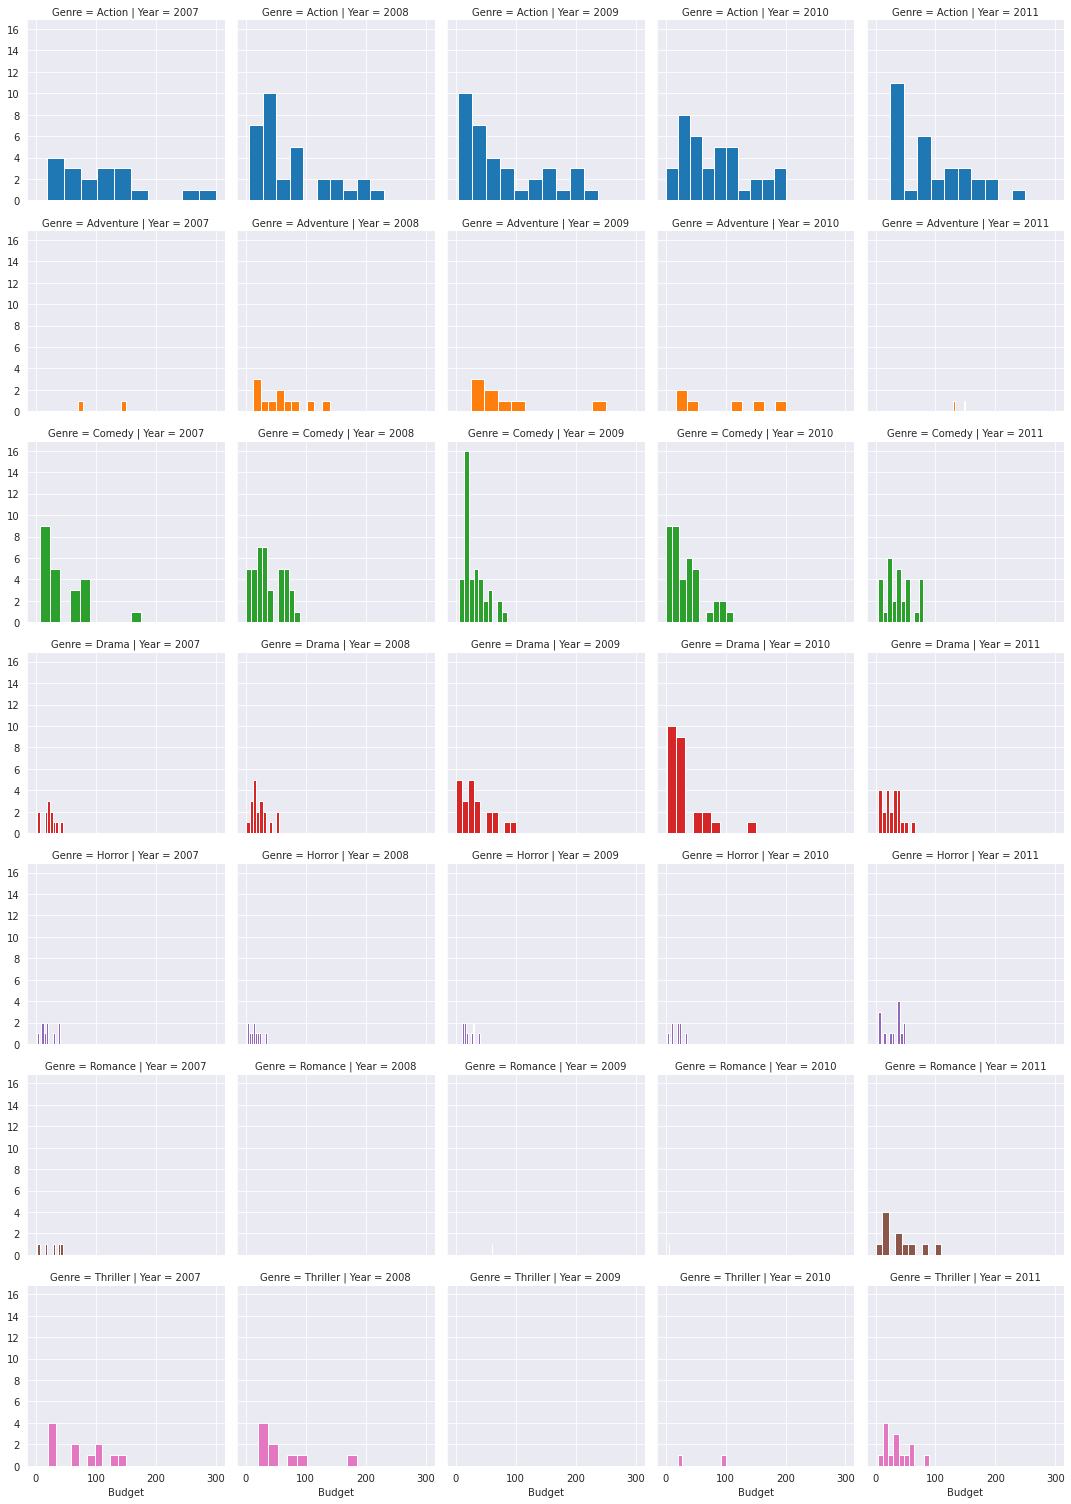

In [73]:
f = sns.FacetGrid(data, row = "Genre", col='Year',hue='Genre')
f = f.map(plt.hist, 'Budget')

Coordinates and Diagonals
-----

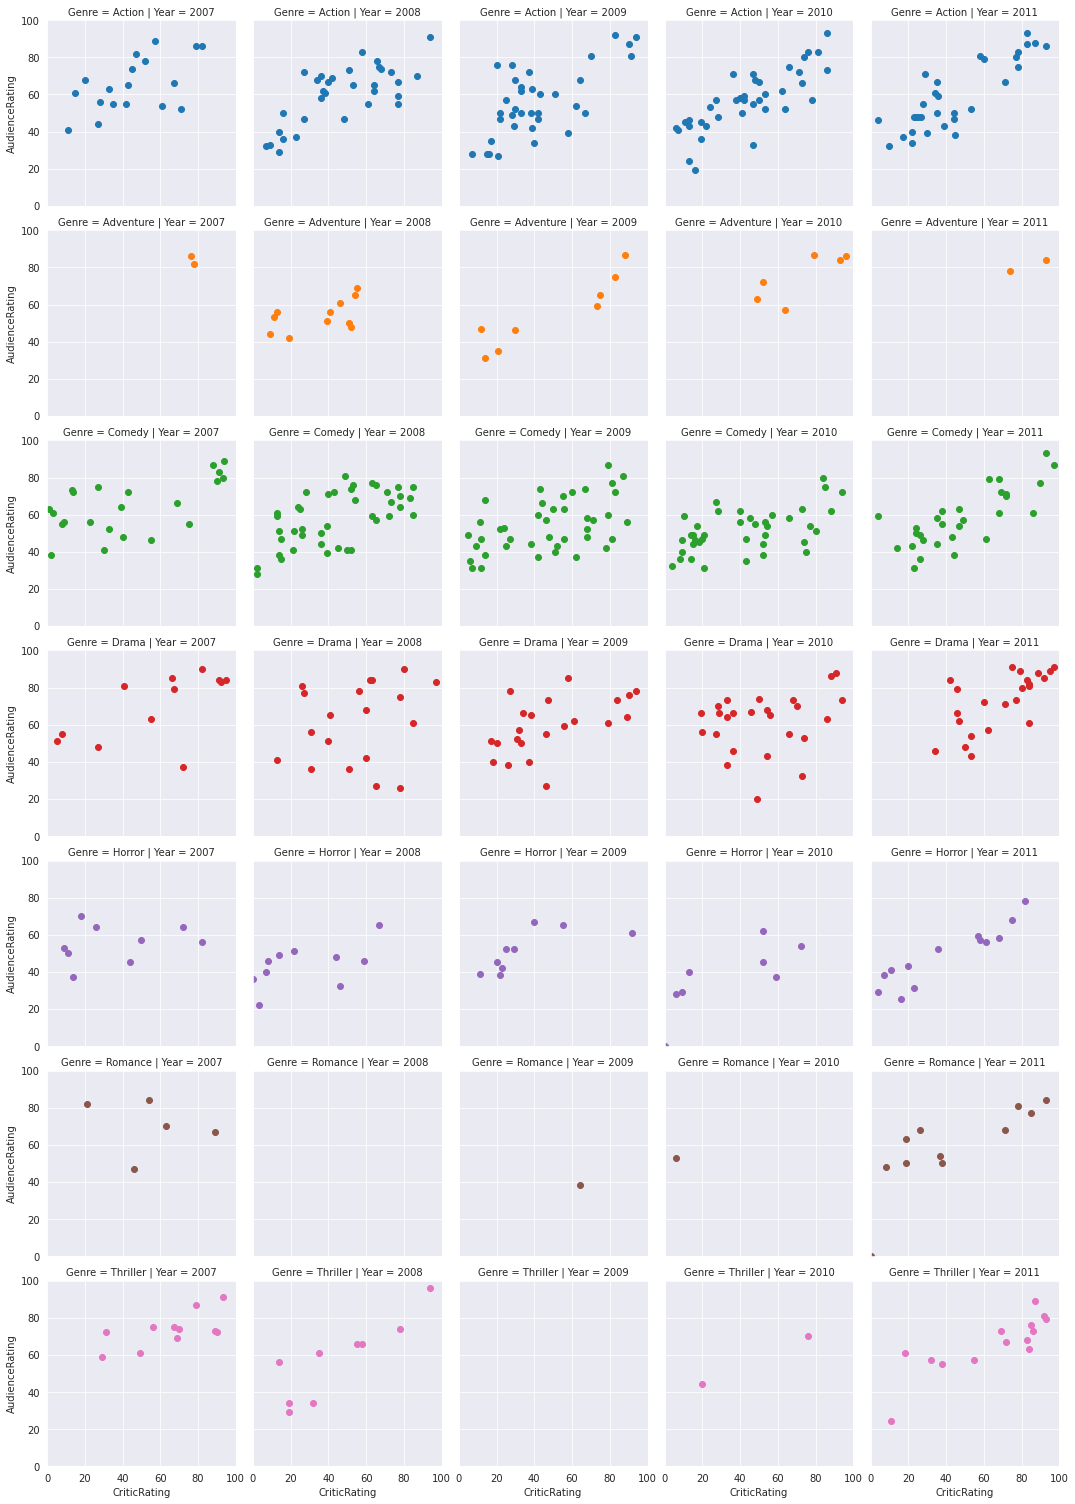

In [76]:
f = sns.FacetGrid(data, row = "Genre", col='Year',hue='Genre')
f = f.map(plt.scatter, 'CriticRating', 'AudienceRating')
f.set(xlim=(0,100), ylim =(0,100))

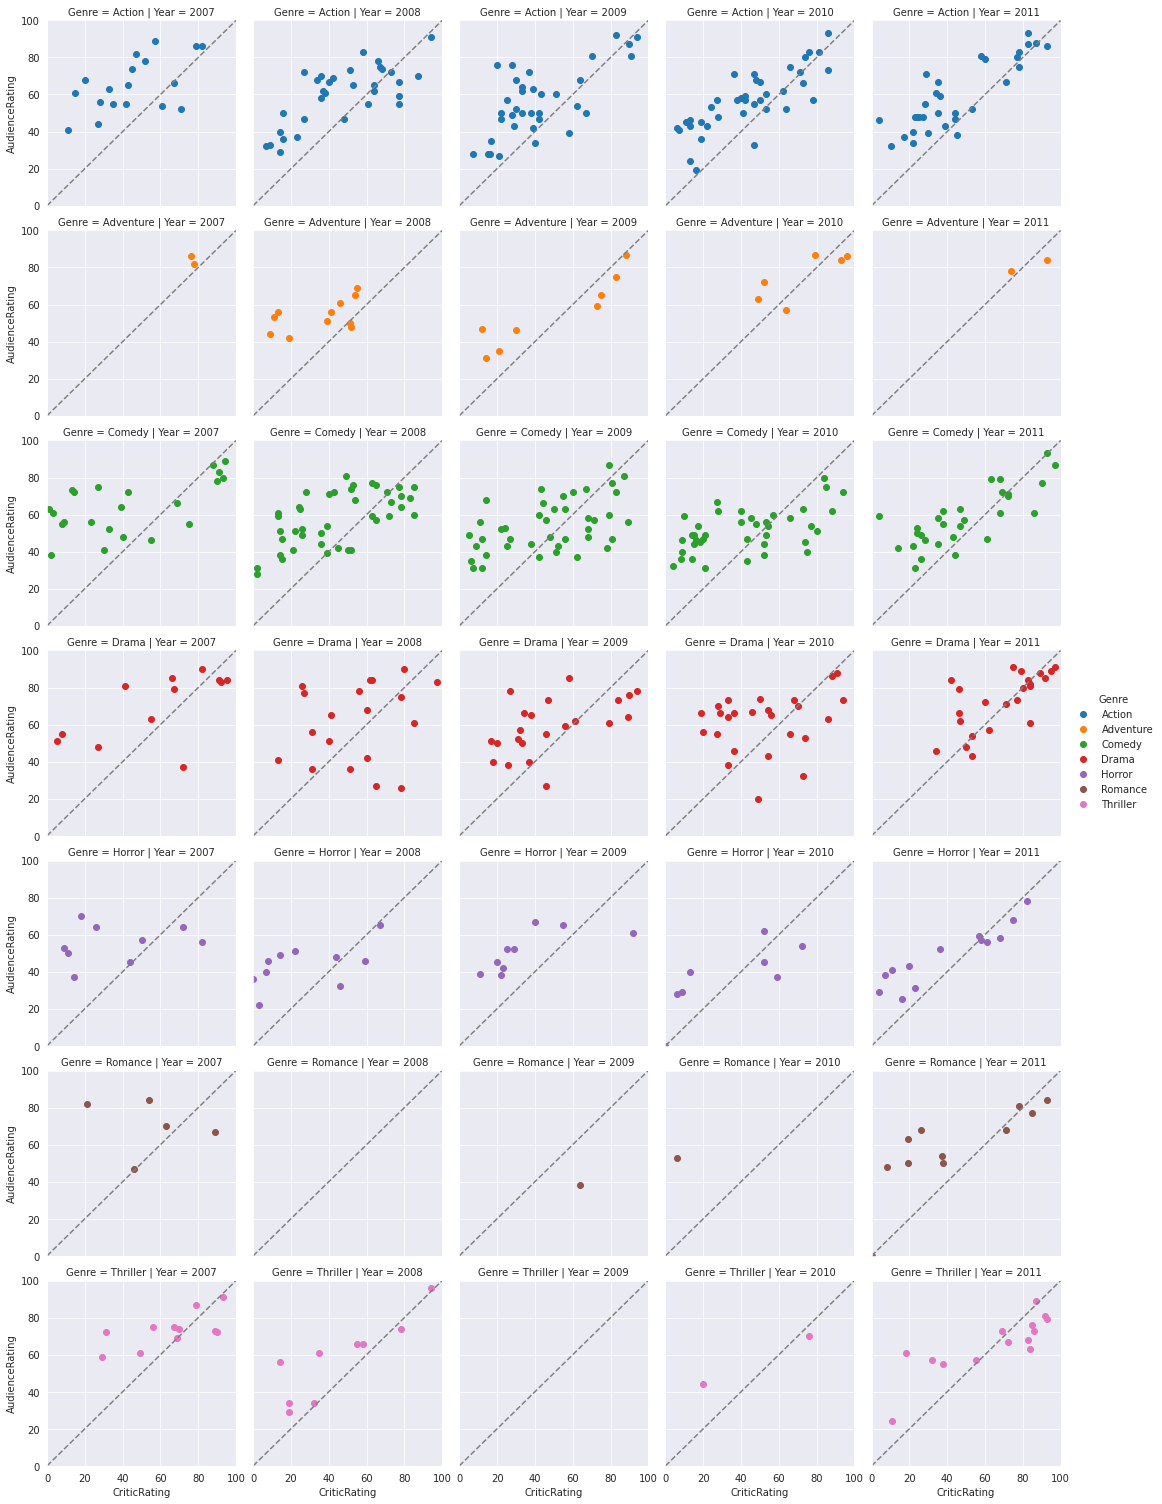

In [79]:
f = sns.FacetGrid(data, row = "Genre", col='Year',hue='Genre')
f = f.map(plt.scatter, 'CriticRating', 'AudienceRating')
f.set(xlim=(0,100), ylim =(0,100))

for ax in f.axes.flat:
    ax.plot((0,100),(0,100), c='grey', ls="--")
    
f.add_legend()

----

Dashboard
------

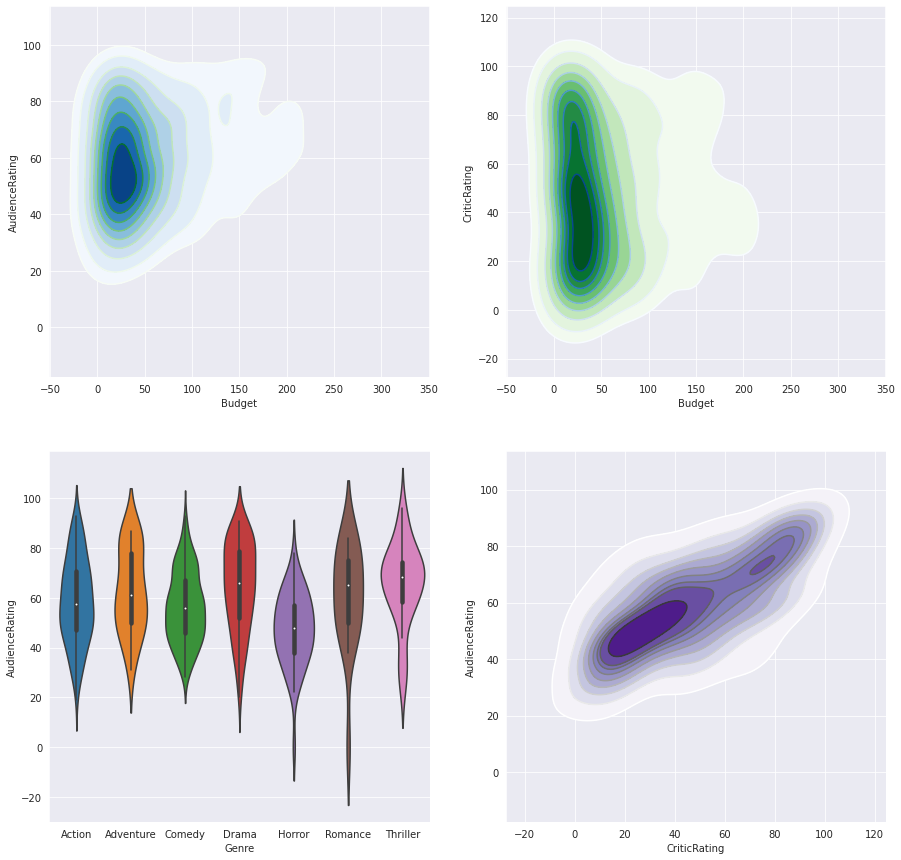

In [86]:
f, ax = plt.subplots(2,2, figsize = (15,15))
sns.kdeplot(data.Budget, data.AudienceRating, shade=True, cmap = 'Blues', ax = ax[0,0])
sns.kdeplot(data.Budget, data.AudienceRating, cmap = 'Greens', ax = ax[0,0])

sns.kdeplot(data.Budget, data.CriticRating, shade=True, cmap = 'Greens', ax=ax[0,1])
sns.kdeplot(data.Budget, data.CriticRating, cmap = 'Blues', ax=ax[0,1])

sns.kdeplot(data.CriticRating, data.AudienceRating, shade=True, cmap = 'Purples', ax=ax[1,1])
sns.kdeplot(data.CriticRating, data.AudienceRating, cmap = 'Greys', ax=ax[1,1])

sns.violinplot(x = 'Genre', y = 'AudienceRating', data = data, ax = ax[1,0])
plt.show()